<a href="https://colab.research.google.com/github/danykoud/_NLP/blob/main/Reference_Notebook_Milestone_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Milestone 1**

## **Context**
 - Why is this problem important to solve?

### **The objectives:**

 - What is the intended goal?

###**The key questions:**

- What are the key questions that need to be answered?



###**The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM.

**Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car. (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC.

**Power** : The maximum power of the engine in bhp.

**Seats** : The number of seats in the car.

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### **Loading libraries**

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

### **Let us load the data**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/used_cars.csv")

### **Understand the data by observing a few rows**

In [ ]:
# View first 5 rows
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
# View last 5 rows Hint: Use tail() method
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


#### **Observations and Insights: **

- Dataset has 7253 rows and 14 columns (features).
- There's a lot of missing values - data preparation will be necessary.
- S.No. is a sequential number per row (index).
- Dataset is comprised of cars names (brand and model), city of location, year made, kilometers driven, fuel type, transmission type, ownership type, mileage, engine power, number of seats, new price and price.

### **Let us check the data types and and missing values of each column** 

In [ ]:
# Check the datatypes of each column. Hint: Use info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [ ]:
# Check total number of missing values of each column. Hint: Use isnull() method
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

#### **Observations and Insights: **

- Lots of missing values mainly for New_price and Price (which is what we're traying to predict).

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence it can be dropped.

In [ ]:
# Remove S.No. column from data. Hint: Use inplace = True
data.drop('S.No.',inplace = True,axis=1)

## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [ ]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
Seats,7200.0,5.280417,0.809277,2.00,5.000,5.00,5.0000,10.00
New_price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00


#### **Observations and Insights: **

- Car year ranges from 1996 to 2019.
- Km driven ranges from 171 to 6.5M (this doesn't seem right).
- Mileage ranges from 0 (it doesn't seem right) to 33.54.
- Power ranges from ~34.2 to 616.
- Seats ranges from 2 to 10.
- Prince ranges from 0.44 to 160 (in INR 100,000).

### **Let us also explore the summary statistics of all categorical variables and the number of unique observations in each category**

In [ ]:
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 
data.describe(include=['object']).T

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


**Number of unique observations in each category**

In [ ]:
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts())
    print('-'*50)

For column: Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
For column: Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
For column: Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Typ

#### **Observations and Insights: **

- There's no missing values for categorical variables.
- Observations look neat for categories.

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [ ]:
#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven',ascending=False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


#### **Observations and Insights: **

- 6.5M km for a 2017 doesn't seem right.
- Other rows seem right.

In the first row, a car manufactured as recently as 2017 having been driven 6500000 km is almost impossible. It can be considered as data entry error and so we can remove this value/entry from data.

In [ ]:
# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop(2328, axis=0, inplace=True)

**Check Mileage extreme values**

In [ ]:
#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage',ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


#### **Observations**
* Mileage of cars can not be 0, so we should treat 0's as missing values. We will do it in the Feature Engineering part

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [ ]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.

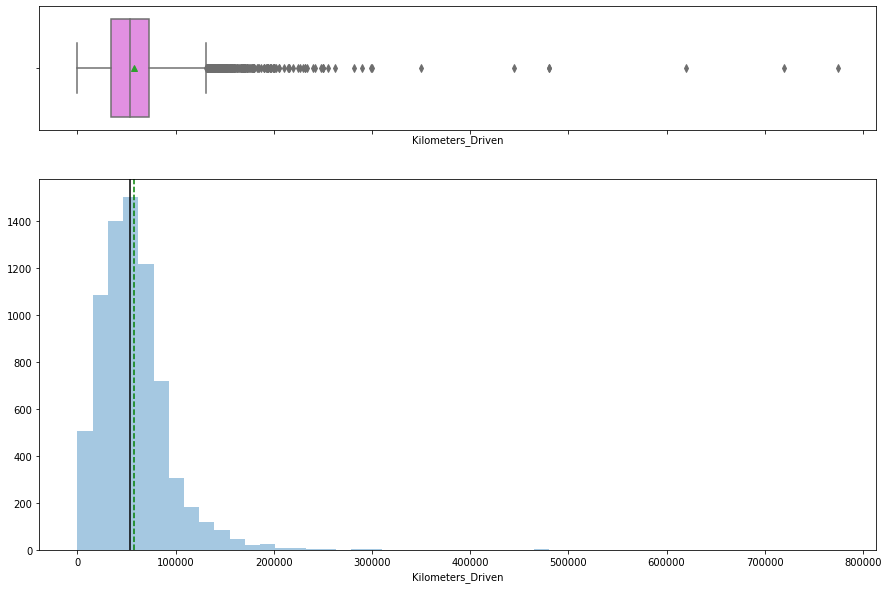

In [ ]:
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

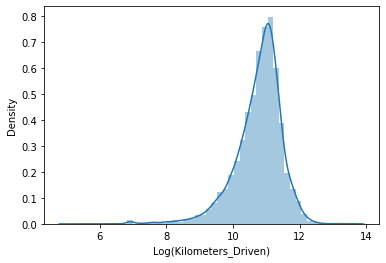

In [ ]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

#### **Observations and Insights: **

- There's a lot of outliers in the right side of the mean for this variable, which is expected.

In [ ]:
### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use log transformation on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset. You can name the variable as **'price_log'**

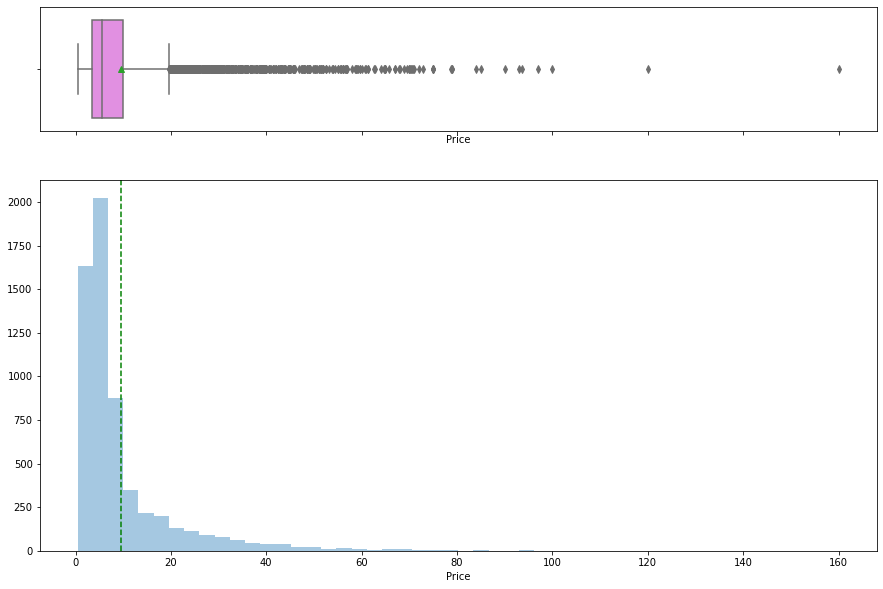

In [ ]:
# Plot histogram and box-plot for 'Price'

histogram_boxplot(data['Price'])

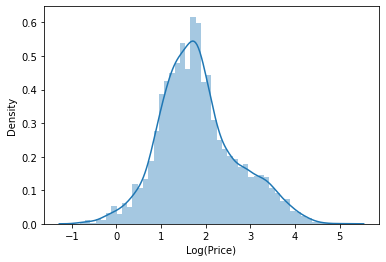

In [ ]:
# Log transformation of the feature 'Price'

sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

In [ ]:
# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])

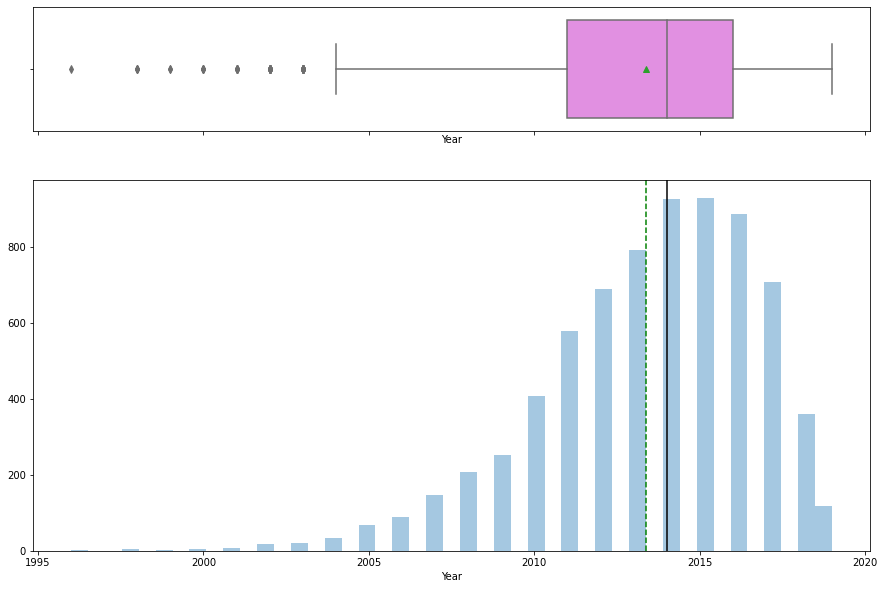

In [ ]:
histogram_boxplot(data['Year'])

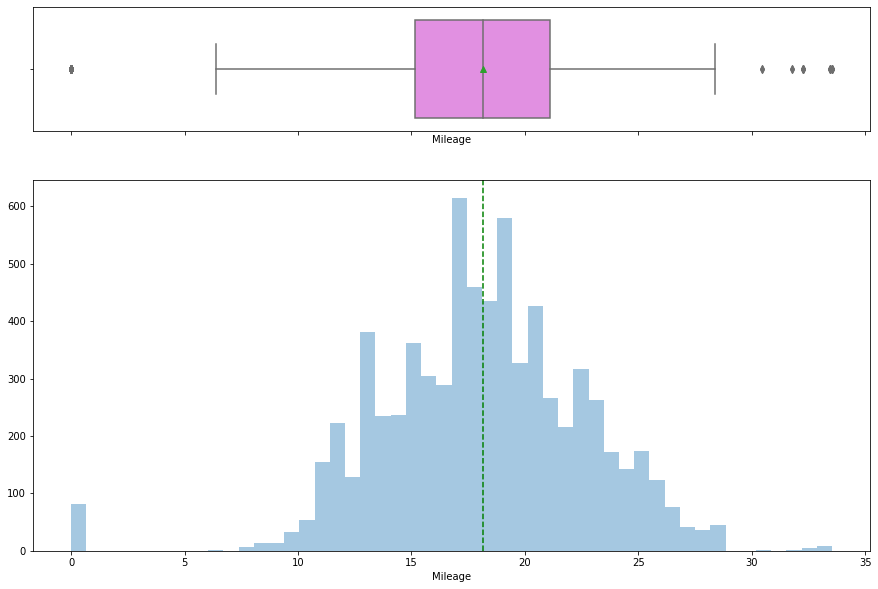

In [ ]:
histogram_boxplot(data['Mileage'])

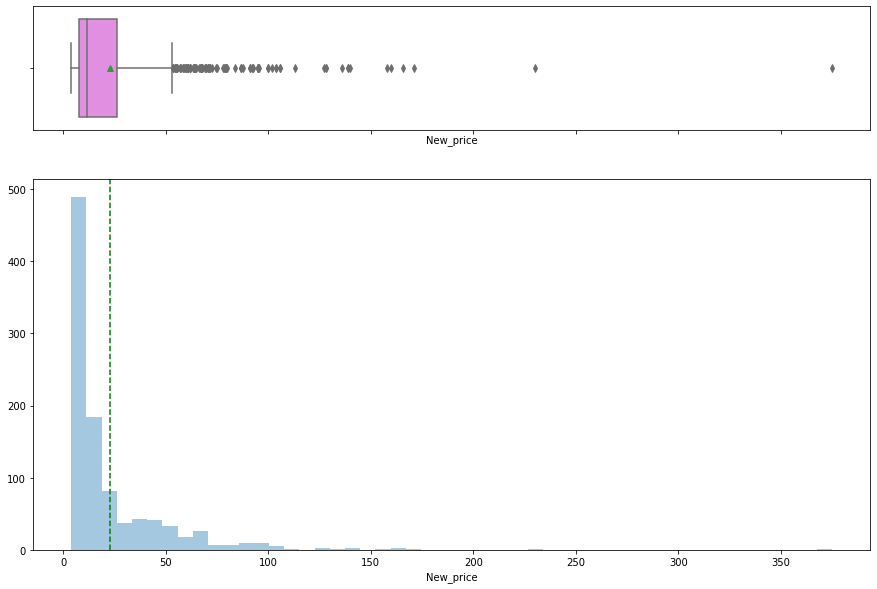

In [ ]:
histogram_boxplot(data['New_price'])

#### **Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

#### **Observations and Insights for all the plots: **

- Year is left skewed with a few outliers, which is normal.
- Mileage looks normally distributed.
- New_price is also heavly right skewed.

## **2. Univariate analysis - Categorical Data**

In [ ]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot

#### Let us plot barplot for the variable location. It will be helpful to know the number of percentage of cars from each city.

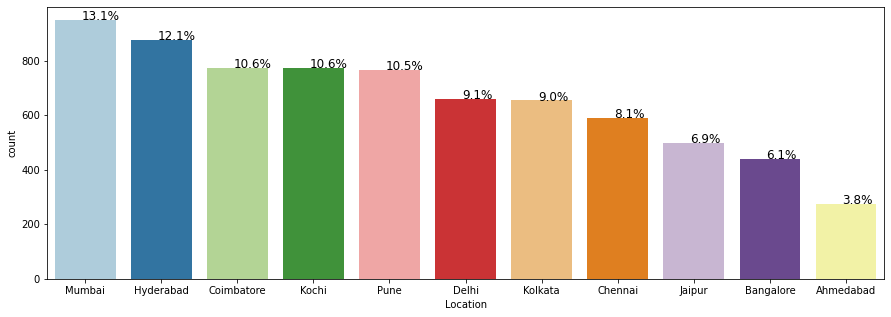

In [ ]:
#Bar Plot for 'Location'
perc_on_bar('Location')

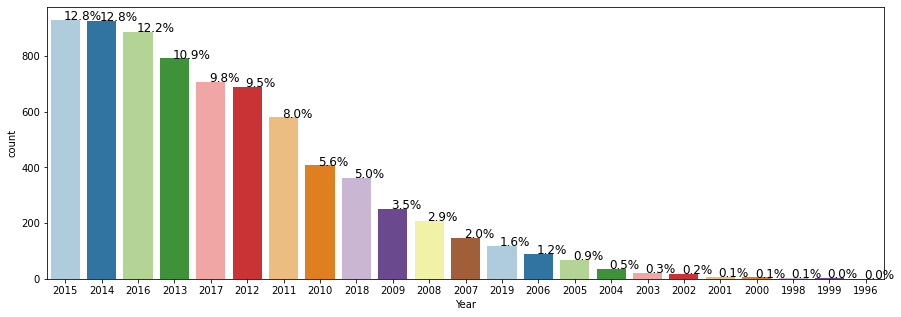

In [ ]:
perc_on_bar('Year')

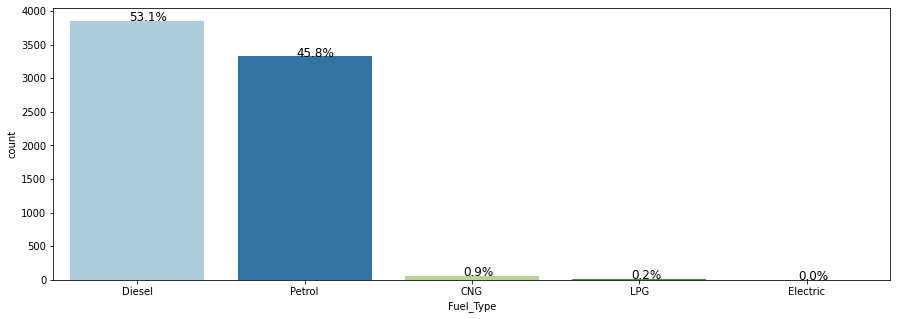

In [ ]:
perc_on_bar('Fuel_Type')

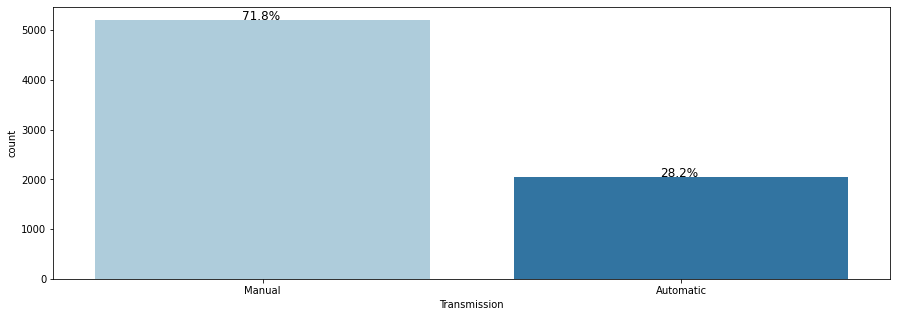

In [ ]:
perc_on_bar('Transmission')

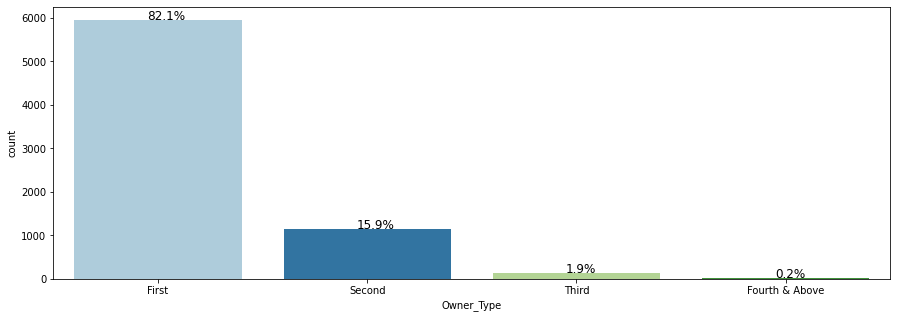

In [ ]:
perc_on_bar('Owner_Type')

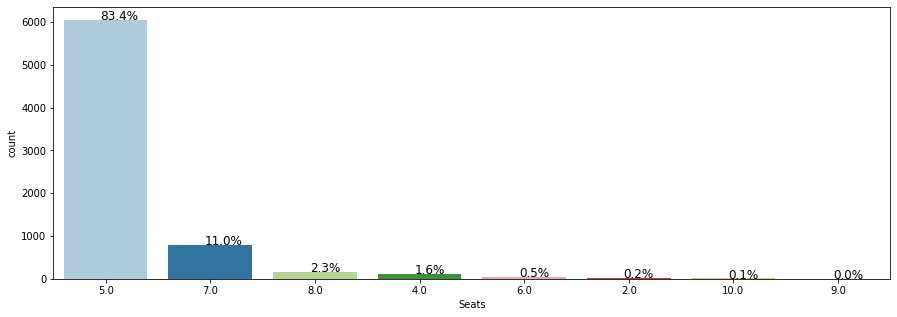

In [ ]:
perc_on_bar('Seats')

#### **Note:** Explore for other variables like Year, Fuel_Type, Transmission, Owner_Type`

#### **Observations and Insights from all plots: **

- Most cars are located in Mumbai.
- The majority of cars where made after 2010.
- Most cars fuel type is diesel followed closely by petrol.
- Most cars have manual transmission.
- Majority of cars were only owned by one person.
- The majority of the cars have 5 seats.

## **Bivariate Analysis**

### **1. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

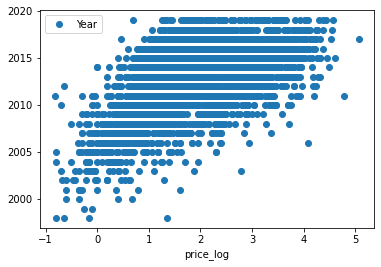

In [ ]:
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='price_log', y='Year', style='o')

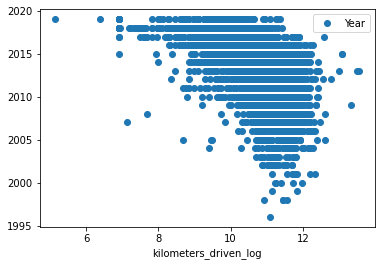

In [ ]:
data.plot(x='kilometers_driven_log', y='Year', style='o')

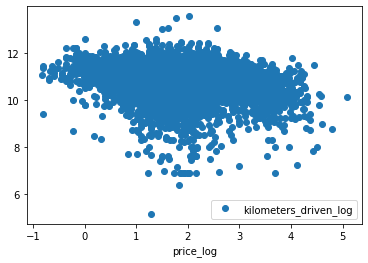

In [ ]:
data.plot(x='price_log', y='kilometers_driven_log', style='o')

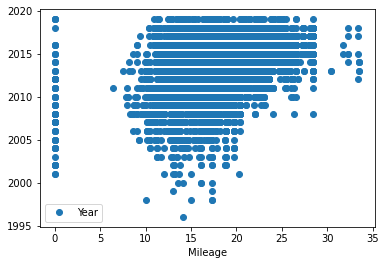

In [ ]:
data.plot(x='Mileage', y='Year', style='o')

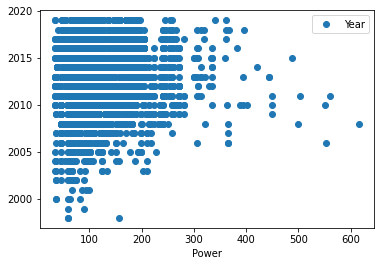

In [ ]:
data.plot(x='Power', y='Year', style='o')

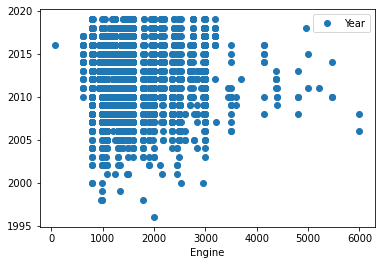

In [ ]:
data.plot(x='Engine', y='Year', style='o')

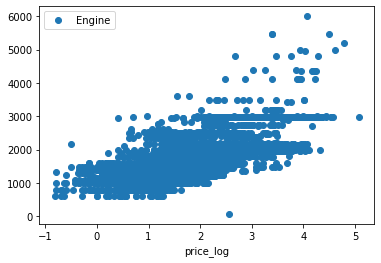

In [ ]:
data.plot(x='price_log', y='Engine', style='o')

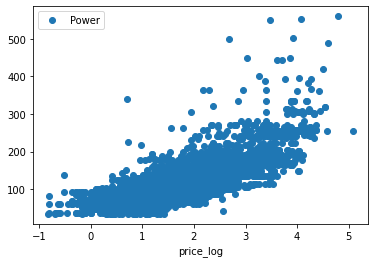

In [ ]:
data.plot(x='price_log', y='Power', style='o')

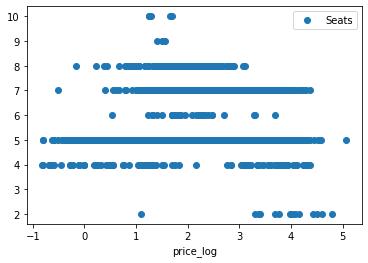

In [ ]:
data.plot(x='price_log', y='Seats', style='o')

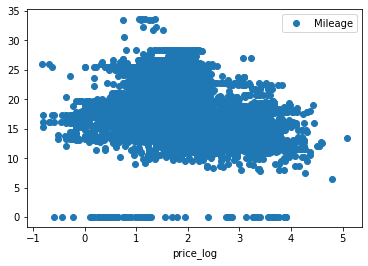

In [ ]:
data.plot(x='price_log', y='Mileage', style='o')

<b>Note:</b> Try to explore different combinations of independent variables and dependent variable. Understand the relationship between all variables.

#### **Observations and Insights from all plots: **

- We can observe that the price increases as: the year is higher (newer cars), engine displacement is bigger, engine power is higher.
- Mileage and kilometers driven have no impact on price, which is weird.
- Mileage is higher for newer cars, as expected.
- Power and Engine peaks in the late 2000's and early 2010's.

### **2. Heat map**
Heat map shows a 2D correlation matrix between two discrete features

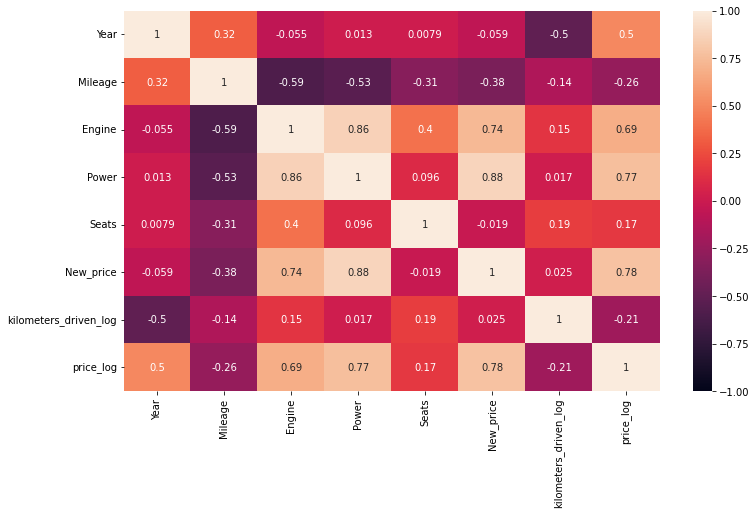

In [ ]:
#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

**Observations and Insights: **

- Power and Engine are highly correlated, as expected.
- Engine and New_price and price_log are highly correlated.
- Year and price are slightly correlated.
- Year and Mileage are slightly correlated.
- Year and km driven have really low correlation, which is not expected.

### **3. Box plot**

In [ ]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

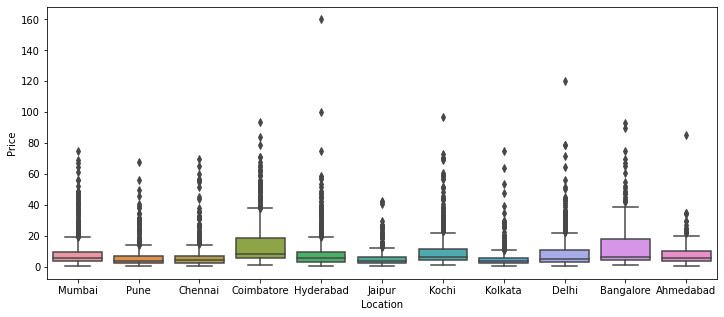

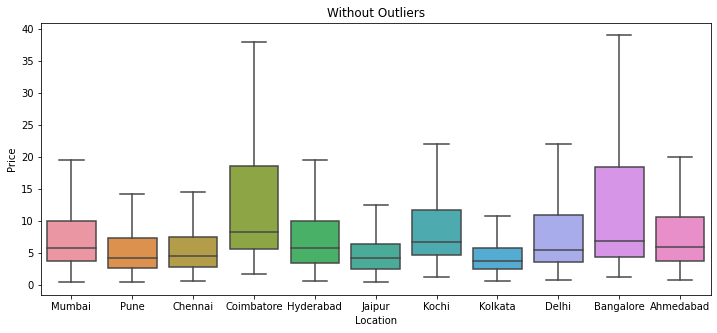

In [ ]:
#Box Plot:Price vs Location
boxplot(data['Location'])

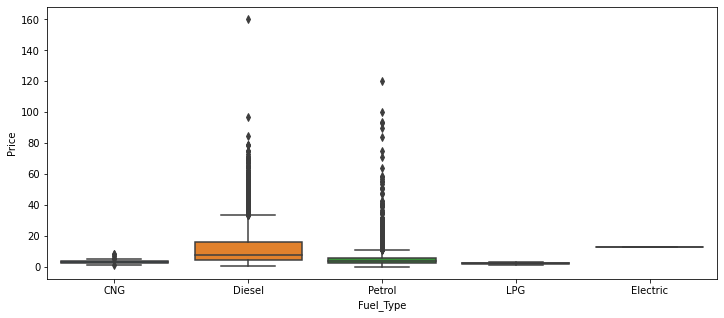

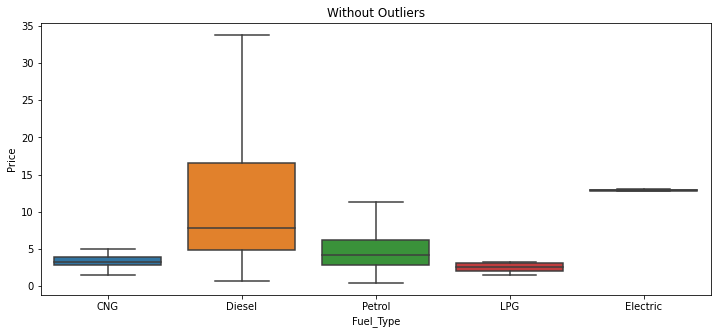

In [ ]:
boxplot(data['Fuel_Type'])

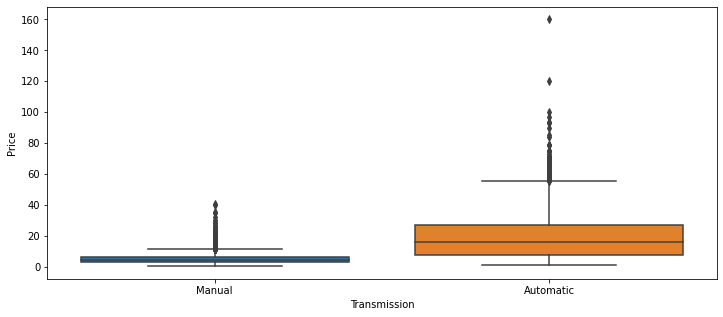

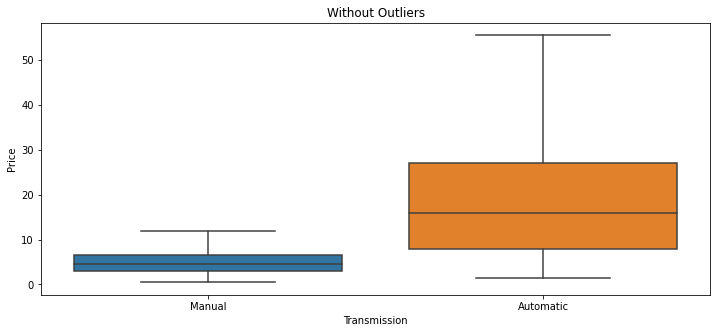

In [ ]:
boxplot(data['Transmission'])

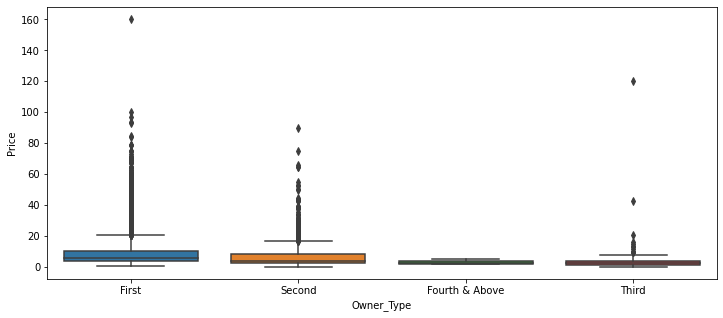

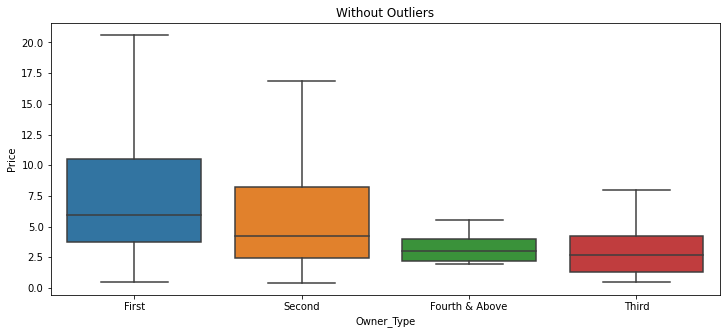

In [ ]:
boxplot(data['Owner_Type'])

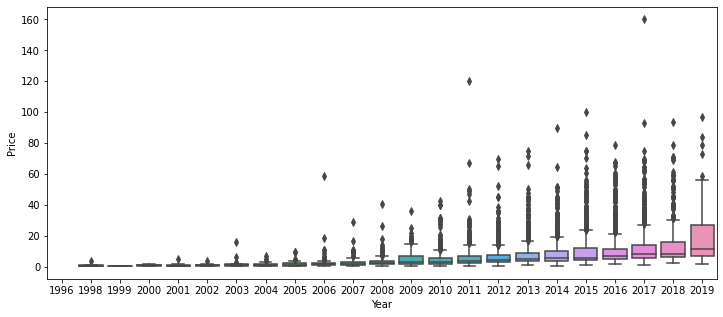

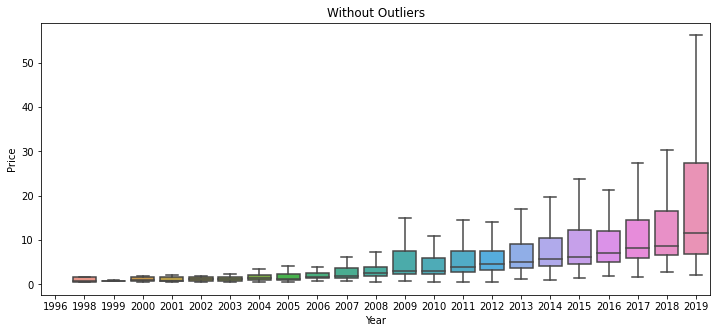

In [ ]:
boxplot(data['Year'])

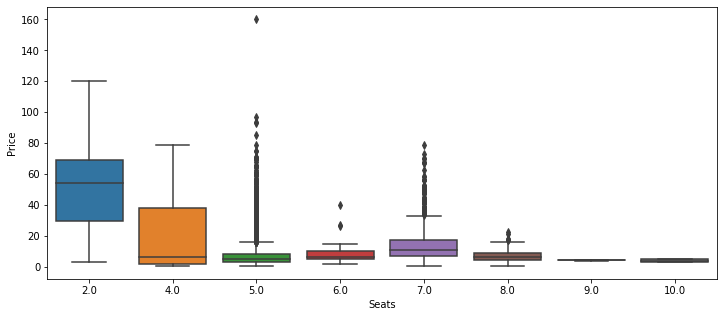

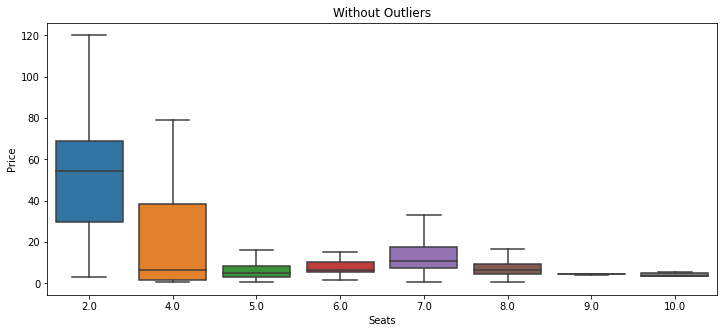

In [ ]:
boxplot(data['Seats'])

<b>Note: </b> Explore by plotting box-plots for target variable and the other categorical variables like Fuel_Type, transmission, Owner_type.

**Observations and Insights for all plots**


### **Feature engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column? 

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [ ]:
data['Brand'] = data['Name'].str.split(' ').str[0]
data['Model'] = data['Name'].str.split(' ').str[1]

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,11.184421,0.559616,Maruti,Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10.621327,2.525729,Hyundai,Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,10.736397,1.504077,Honda,Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,11.373663,1.791759,Maruti,Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,10.613246,2.875822,Audi,A4


#### **Observations and Insights: **

- 2 new variables were added, named Brand and Model.

### **Missing value treatment**

In [ ]:
# Now check the missing values of each column. Hint: Use isnull() method

data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

#### **Observations and Insights: **

- There's a lot of missing values for Price and New_price.

**Missing values in Seats**

In [ ]:
# Checking missing values in the column 'Seats'

data[data['Seats'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,kilometers_driven_log,price_log,Brand,Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,11.002200,1.081805,Honda,City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,10.645449,0.746688,Maruti,Swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,11.162460,1.280934,Ford,Figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,11.490680,0.559616,Maruti,Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,10.915107,3.277145,Land,Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,10.915179,1.163151,Honda,City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,10.825661,1.757858,Maruti,Swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,11.652687,0.405465,Honda,City
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,11.142992,3.710641,Land,Rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,11.385092,0.530628,Honda,City


**Think about it:** Can we somehow use the extracted information from 'Name' column to impute missing values?

**Hint:** Impute these missing values one by one, by taking median number of seats for the particular car, using the Brand and Model name

In [ ]:
# Impute missing values in Seats,you can use fillna method in pandas

data['Seats'] = data.groupby(['Brand','Model'])['Seats'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data['Seats'] = data.groupby(['Brand'])['Seats'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method

data.Seats.isnull().sum()

0

**Missing values for Mileage**

In [ ]:
# Now check missing values of each column. Hint: Use isnull() method

data.isnull().sum()

Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                       0
New_price                6246
Price                    1234
kilometers_driven_log       0
price_log                1234
Brand                       0
Model                       0
dtype: int64

In [ ]:
# Impute missing Mileage. For example use can use median or any other methods.

data.Mileage.fillna(data.Mileage.median(), inplace = True)

In [ ]:
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method

data.Mileage.isnull().sum()

0

In [ ]:
data['Mileage']=data['Mileage'].replace(0, np.nan)

In [ ]:
data['Mileage'] = data.groupby(['Brand','Model'])['Mileage'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data.Mileage.fillna(data.Mileage.median(), inplace = True)

In [ ]:
data.Mileage.isnull().sum()

0

**Missing values for Engine**

In [ ]:
data['Engine'] = data.groupby(['Brand','Model'])['Engine'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data.Engine.isnull().sum()

0

**Missing values for Power**

In [ ]:
data['Power'] = data.groupby(['Brand','Model'])['Power'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data['Power'] = data.groupby(['Brand','Model'])['Power'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
data.Power.fillna(data.Power.median(), inplace = True)

In [ ]:
data.Power.isnull().sum()

0

**Missing values for New_price**

In [ ]:
data['New_price'] = data.groupby(['Brand','Model'])['New_price'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data.New_price.fillna(data.New_price.median(), inplace = True)

In [ ]:
data.New_price.isnull().sum()

0

**Missing values for Price and price_log**

In [ ]:
data['Price'] = data.groupby(['Brand','Model'])['Price'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data.Price.fillna(data.Price.median(), inplace = True)

In [ ]:
data.Price.isnull().sum()

0

In [ ]:
data['price_log'] = data.groupby(['Brand','Model'])['price_log'].apply(lambda x: x.fillna(x.median()))

In [ ]:
data.price_log.fillna(data.price_log.median(), inplace = True)

In [ ]:
data.price_log.isnull().sum()

0

#### **Observations for missing values after imputing: **

- Missing values were imputed considering other entries with same brand and model.
- The remaining missing values that were not replaced by similar entries were replaced by the mean value of the same column.
- I've transformed all "0" entries in Mileage to NaN to then replace them using the techniques mentioned above.

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
- **Overall solution design -** What is the potential solution design?
- **Measures of success -** What are the key measures of success?

## **Model Building**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split Data**

<li>Step1: Split the data into X and Y . 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

<b>Think about it:</b> Why we should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

In [ ]:
# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# For tuning the model
from sklearn.model_selection import GridSearchCV

In [ ]:
# Step-1
X = data.drop(['Name','Price','price_log','Kilometers_Driven'],axis=1)
y = data[["price_log", "Price"]]

In [ ]:
# Step-2 Use pd.get_dummies(drop_first=True)
X = pd.get_dummies(X,drop_first=True)

In [ ]:
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(5076, 275) (2176, 275)


In [ ]:
# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-square on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list

For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

### **Fitting a linear model**

Linear Regression can be implemented using: <br>

**1) Sklearn:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
**2) Statsmodels:** https://www.statsmodels.org/stable/regression.html

In [ ]:
# import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

In [ ]:
# Create a linear regression model
lr = LinearRegression()

In [ ]:
# Fit linear regression model
lr.fit(X_train,y_train['price_log'])

LinearRegression()

In [ ]:
LR_score = get_model_score(lr)

R-square on training set :  0.9194014093585517
R-square on test set :  0.8641841562121787
RMSE on training set :  3.050084558545286
RMSE on test set :  3.944053988076218


#### **Observations from results: _____**

### **Important variables of Linear Regression**

Building a model using statsmodels

In [ ]:
# Import Statsmodels 
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(X_train)
# Add constant to test data
x_test = sm.add_constant(X_test)

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


# Fit linear model on new dataset
olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     329.5
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:38:25   Log-Likelihood:                 794.91
No. Observations:                5076   AIC:                            -1116.
Df Residuals:                    4839   BIC:                             432.3
Df Model:                         236                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
# Retrive Coeff values, p-values and store them in the dataframe
olsmod = pd.DataFrame(olsmodel1.params, columns=['coef'])
olsmod['pval']=olsmodel1.pvalues

In [ ]:
# Filter by significant p-value (pval <0.05) and sort descending by Odds ratio
olsmod = olsmod.sort_values(by="pval", ascending=False)
pval_filter = olsmod['pval']<=0.05
olsmod[pval_filter]

,coef,pval
Model_Camry,-1.723680e-01,0.040475
Model_CR-V,-1.137681e-01,0.036426
Model_SLK-Class,3.353011e-01,0.030497
Model_NuvoSport,-2.048654e-16,0.029986
Model_Swift,-1.692517e-01,0.028008
...,...,...
Brand_Fiat,-5.239326e+00,0.000000
Brand_Chevrolet,-5.200758e+00,0.000000
Year,8.960520e-02,0.000000
Fuel_Type_Electric,3.390881e-12,0.000000


In [ ]:
# we are looking are overall significant variable
pval_filter = olsmod['pval']<=0.05
imp_vars = olsmod[pval_filter].index.tolist()

# we are going to get overall variables (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in data.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
 

start = '\033[1m'
end = '\033[95m'
print(start+'Most overall significant categorical varaibles of LINEAR REGRESSION  are '+end,':\n',sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are  :
 ['Model', 'Location', 'Engine', 'New_price', 'Owner_Type', 'Transmission', 'Power', 'kilometers_driven_log', 'Brand', 'Year', 'Fuel_Type']


<b>Build Ridge / Lasso Regression similar to Linear Regression:</b><br>

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [ ]:
# import Ridge/ Lasso Regression from sklearn

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
# Create a Ridge regression model

ridge = Ridge()

In [ ]:
ridge.fit(X_train,y_train['price_log'])

Ridge()

In [ ]:
# Get score of the model.

LR_score_ridge = get_model_score(ridge)

R-square on training set :  0.9019778272765256
R-square on test set :  0.8846680788948278
RMSE on training set :  3.363646270977617
RMSE on test set :  3.6344809442903223


#### **Observations from results: _____**

### **Decision Tree** 

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [ ]:
# import Decision tree for Regression from sklearn

from sklearn.tree import DecisionTreeRegressor 

In [ ]:
# Create a decision tree regression model
dtree = DecisionTreeRegressor(random_state=1)

In [ ]:
# Fit decision tree regression model.
dtree.fit(X_train,y_train['price_log'])

DecisionTreeRegressor(random_state=1)

In [ ]:
# Get score of the model.
Dtree_model = get_model_score(dtree)


R-square on training set :  0.999908205603226
R-square on test set :  0.7942532679528236
RMSE on training set :  0.10293338189909366
RMSE on test set :  4.854383757797011


#### **Observations from results: _____**

Print the importance of features in the tree building (The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)

In [ ]:
print(pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                            Imp
Power                  0.650061
Year                   0.190497
New_price              0.060327
kilometers_driven_log  0.020255
Mileage                0.010902
...                         ...
Model_Platinum         0.000000
Model_Petra            0.000000
Model_Panamera         0.000000
Model_Pajero           0.000000
Model_redi-GO          0.000000

[275 rows x 1 columns]


#### **Observations and insights: _____**

### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
# import Randomforest for Regression from sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse

In [ ]:
# Create a Randomforest regression model

rforest = RandomForestRegressor(n_estimators = 100, random_state = 1)

In [ ]:
# Fit Randomforest regression model.

rforest.fit(X_train,y_train['price_log'])

RandomForestRegressor(random_state=1)

In [ ]:
# Get score of the model.

Rforest_model = get_model_score(rforest)

R-square on training set :  0.9745907343233768
R-square on test set :  0.8601002539891942
RMSE on training set :  1.712553756894509
RMSE on test set :  4.002912492224137


#### **Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features similar to decision trees
print(pd.DataFrame(rforest.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                            Imp
Power                  0.637787
Year                   0.189883
New_price              0.065492
kilometers_driven_log  0.019363
Engine                 0.018548
...                         ...
Brand_Lamborghini      0.000000
Model_Gallardo         0.000000
Model_F                0.000000
Fuel_Type_Electric     0.000000
Model_Boxster          0.000000

[275 rows x 1 columns]


#### **Observations and insights: _____**

### **Hyperparameter Tuning: Decision Tree** - HELP

In [ ]:
# Create a decision tree regression model
dtr = DecisionTreeRegressor(random_state=42)

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dtr.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}


# 1: max_depth:

The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node: <br>
Using the max_depth parameter, I can limit up to what depth I want every tree in my random forest to grow

# 2: min_sample_split

The default value of the minimum_sample_split is assigned to 2. This means that if any terminal node has more than two observations and is not a pure node, we can split it further into subnodes.

Having a default value as 2 poses the issue that a tree often keeps on splitting until the nodes are completely pure. As a result, the tree grows in size and therefore overfits the data. <br>
By increasing the value of the min_sample_split, we can reduce the number of splits that happen in the decision tree and therefore prevent the model from overfitting.

# 3: min_samples_leaf(int, float, optional (default=1)) 

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. - If int, then consider min_samples_leaf as the minimum number. - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Cl: 

It specifies the minimum number of samples that should be present in the leaf node after splitting a node.

# 4: n_estimators

We might say that more trees should be able to produce a more generalized result, right? But by choosing more number of trees, the time complexity of the Random Forest model also increases.

This means that choosing a large number of estimators in a random forest model is not the best idea. Although it will not degrade the model, it can save you the computational complexity and prevent the use of a fire extinguisher on your CPU!
# 5: max_samples

# 6: max_features  (int, float, string or None, optional (default=None))
 

- The number of features to consider when looking for the best split: - If int, then consider max_features features at each split. - If float, then max_features is a fraction and


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,9,12],
           "min_samples_leaf":[1,5,15],
           'min_samples_split':[2,6,10,14],
           "max_features":["auto","sqrt"]
             }
      


In [ ]:
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

# Run the grid search & Fit decision tree regression model.
grid_dtr = HalvingGridSearchCV(dtr, parameters, scoring="neg_root_mean_squared_error",verbose= 4, n_jobs=-1, cv=10).fit(X_train, y_train['price_log'])

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 62
max_resources_: 5076
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 192
n_resources: 62
Fitting 10 folds for each of 192 candidates, totalling 1920 fits
----------
iter: 1
n_candidates: 64
n_resources: 186
Fitting 10 folds for each of 64 candidates, totalling 640 fits
----------
iter: 2
n_candidates: 22
n_resources: 558
Fitting 10 folds for each of 22 candidates, totalling 220 fits
----------
iter: 3
n_candidates: 8
n_resources: 1674
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 4
n_candidates: 3
n_resources: 5022
Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [ ]:
bbmod= grid_dtr.best_estimator_

In [ ]:
grid_dtr.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'splitter': 'best'}

In [ ]:
get_model_score(bbmod)


R-square on training set :  0.9074742817378049
R-square on test set :  0.8176505825192184
RMSE on training set :  3.267979987352243
RMSE on test set :  4.5700381258570575


[0.9074742817378049, 0.8176505825192184, 3.267979987352243, 4.5700381258570575]

In [ ]:
# # Choose the type of estimator. 
# dtree_tuned = DecisionTreeRegressor(random_state=1)

# # Grid of parameters to choose from.
# # Check documentation for all the parameters that the model takes and play with those.
# parameters = {"splitter":["best","random"],
#             "max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

# # Type of scoring used to compare parameter combinations
# scorer = metrics.make_scorer(recall_score, pos_label = 1)

# # Run the grid search
# grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer , cv = 10)

# #Fitting the grid search on the train data
# grid_obj = grid_obj.fit(X_train, y_train)

# # Set the clf to the best combination of parameters
# grid_obj.best_estimator_



In [ ]:
# Fit the best algorithm to the data. 
# dtree_tuned.fit(X_train,y_train)

In [ ]:
# Get score of the dtree_tuned

#### **Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees

#### **Observations and insights: _____**

### **Hyperparameter Tuning: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()


dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
param_grid= {
      "n_estimators":[100,200,300] ,
      "max_depth": [80, 90, 100], 
      'max_features': ['auto', 'sqrt'],
      'min_samples_split': [2, 4, 10],
      'min_samples_leaf': [1, 3, 6]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor() #creating base model

rf_random = RandomizedSearchCV(estimator = rf,
                               param_distributions = param_grid,
                               scoring='neg_root_mean_squared_error', 
                               cv = 5, 
                               verbose=4, 
                               n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train['price_log'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 6],
                                        'min_samples_split': [2, 4, 10],
                                        'n_estimators': [100, 200, 300]},
                   scoring='neg_root_mean_squared_error', verbose=4)

In [ ]:
best_mod =rf_random.best_estimator_

In [ ]:
from pprint import pprint
pprint(rf_random.best_params_)

{'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}


In [ ]:
get_model_score(best_mod)


R-square on training set :  0.9636353198297614
R-square on test set :  0.8551467561186386
RMSE on training set :  2.048745637808449
RMSE on test set :  4.073162584526179


[0.9636353198297614, 0.8551467561186386, 2.048745637808449, 4.073162584526179]

In [ ]:
# Choose the type of Regressor. 

# Define the parameters for Grid to choose from 
# Check documentation for all the parametrs that the model takes and play with those

# Type of scoring used to compare parameter combinations

# Run the grid search

# Set the clf to the best combination of parameters

 

In [ ]:
# Fit the best algorithm to the data.
# Get score of the model.

#### **Observations and insights: _____**

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees

#### **Observations and insights: _____**

In [ ]:
# defining list of models you have trained
models = [lr,dtree, __________________]

# defining empty lists to add train and test results
r2_train = []
r2_test = []
rmse_train= []
rmse_test= []

# looping through all the models to get the rmse and r2 scores
for model in models:
    # accuracy score
    j = get_model_score(model,False)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Linear Regression','Decision Tree',___________,___________], 
                                          'Train_r2': r2_train,'Test_r2': r2_test,
                                          'Train_RMSE':rmse_train,'Test_RMSE':rmse_test}) 
comparison_frame

#### **Observations: _____**

**Note:** You can also try some other algorithms such as kNN and compare the model performance with the existing ones

### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?